In [13]:
import os
import cv2
import shutil
import math
from PIL import Image

In [14]:
!pip install mtcnn
from mtcnn.mtcnn import MTCNN

In [15]:
image = cv2.imread('/kaggle/input/face-recognition-dataset/Face Data/Face Dataset/0/0.jpg')

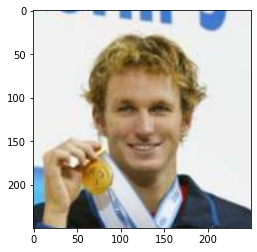

In [16]:
import matplotlib.pyplot as plt
import numpy as np
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixels = np.array(image)

plt.imshow(pixels)
plt.show()

In [17]:
ROOT = "../input/face-recognition-dataset/Face Data/Face Dataset"
cascade_path = "../input/haar-cascades-for-face-detection/haarcascade_frontalface_default.xml"

cascade_model = cv2.CascadeClassifier(cascade_path)
folders = sorted(os.listdir(ROOT))

In [18]:
def extract_face(image):
    """ Gets the face from the image passed using Haar-Cascade """
    
    global cascade_model
    
    # Getting co-ordinates of the face
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = cascade_model.detectMultiScale(
        gray,
        scaleFactor=1.4,
        minNeighbors=5,
        minSize=(32, 32)
    )
    
    # Extracts the face from the image and returns it
    if len(faces)>0:
        x,y,w,h = faces[-1]
        image = image[y:y+h,x:x+w]
        return image
    return None

In [19]:
def save_image(path, image):
    """ Saves the Image to the path specified """
    
    # Creating directory
    directory = os.path.dirname(path)
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    # Saving the image
    cv2.imwrite(path, image)

In [20]:
from torchvision.transforms.functional import to_pil_image

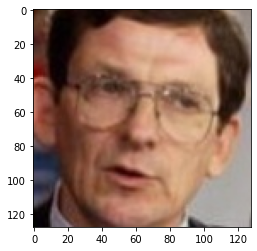

46 54
10.539183728628242


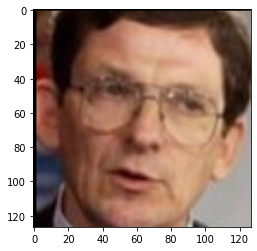

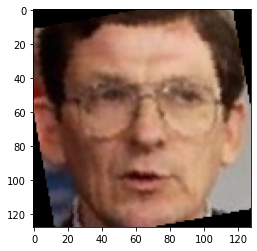

In [21]:
detector = MTCNN()
image = cv2.cvtColor(cv2.imread('/kaggle/input/face-recognition-dataset/Extracted Faces/Extracted Faces/1018/2.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(np.array(image))
plt.show()
faces = detector.detect_faces(image)
#         face = face.permute(1, 2, 0).int().numpy()
x1, y1 = faces[0]['keypoints']['left_eye']
x2, y2 = faces[0]['keypoints']['right_eye']
print(y1, y2)
a = abs(y1 - y2)
b = abs(x2 - x1)
c = math.sqrt(a*a + b*b)
cos_alpha = (b*b + c*c - a*a) / (2*b*c)
alpha = np.arccos(cos_alpha)
alpha = (alpha*180) / math.pi
if y1 > y2: 
    alpha = -alpha
print(alpha)
aligned_image = Image.fromarray(image)
x_margin = int((128 - faces[0]['box'][2]) / 2)
y_margin = int((128 - faces[0]['box'][3]) / 2)
aligned_image = aligned_image.crop((faces[0]['box'][0]-x_margin, faces[0]['box'][1]-y_margin, 
                                    faces[0]['box'][0]+faces[0]['box'][2]+x_margin, faces[0]['box'][1] + faces[0]['box'][3]+y_margin))
plt.imshow(np.array(aligned_image))
plt.show()
aligned_image = aligned_image.rotate(alpha)
aligned_image = aligned_image.resize((128,128), Image.BICUBIC)
# aligned_image = cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB)
plt.imshow(np.array(aligned_image))


In [ ]:
detector = MTCNN()

for folder in folders:
    # Gets list of all files in the folder
    files = os.listdir(os.path.join(ROOT, folder))
    
    num_files = 0
    for file in files:
        # Reads the image and extracts face
        path = os.path.join(ROOT, folder, file)
        image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        faces = detector.detect_faces(image)
#         face = face.permute(1, 2, 0).int().numpy()
        x1, y1 = faces[0]['keypoints']['left_eye']
        x2, y2 = faces[0]['keypoints']['right_eye']
        a = abs(y1 - y2)
        b = abs(x2 - x1)
        c = math.sqrt(a*a + b*b)
        cos_alpha = (b*b + c*c - a*a) / (2*b*c)
        alpha = np.arccos(cos_alpha)
        alpha = (alpha*180) / math.pi
        if y1 > y2: 
            alpha = -alpha
        aligned_image = Image.fromarray(image)
        x_margin = int((128 - faces[0]['box'][2]) / 2)
        y_margin = int((128 - faces[0]['box'][3]) / 2)
        aligned_image = aligned_image.crop((faces[0]['box'][0]-x_margin, faces[0]['box'][1]-y_margin, 
                                            faces[0]['box'][0]+faces[0]['box'][2]+x_margin, faces[0]['box'][1] + faces[0]['box'][3]+y_margin))
        aligned_image = aligned_image.resize((128,128), Image.BICUBIC)
        aligned_image = np.array(aligned_image.rotate(alpha))
        aligned_image = cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB)
        plt.imshow(aligned_image)
        
        # Saves the face
        if not aligned_image is None:
            save_path = os.path.join("Extracted Faces", folder, f"{num_files}.jpg")
            save_image(save_path, aligned_image)
            num_files += 1

In [ ]:
# Removes folders with less that 2 files
for folder in os.listdir("Extracted Faces"):
    path = os.path.join("Extracted Faces", folder)
    files = os.listdir(path)
    if len(files)<2:
        shutil.rmtree(path)

In [ ]:
shutil.make_archive("Extracted Faces",'zip')